# Exploratory Data Analysis on Cab Rides

Problem Statement 
Exploratory data analysis is the first step in the data analysis process. It will show you how to visualize and explore your data in a systematic way. 
Analyze “Cab Rides 2016 dataset" and try to find the hidden relationships among Time (Date), Miles, Purpose, start and end location, and categories.

Data Description 
START_DATE*: Start date of the ride 
END_DATE*: End date of the ride 
CATEGORY*: Ride Category 
Business 
Personal 
START*: Start location of the ride 
STOP*: End location of the ride 
MILES*: Travelling distance 
PURPOSE*: Ride purpose 
Meal/Entertain 
Temporary Site 
Customer Visit 
Airport/Travel 
Between Offices 
Charity ($) 
Commute 
Errand/Supplies 
Meeting 
Moving

Expected Outcome 
Following operations on the data frame are expected: 
Data Preparation 
Missing Value Treatment 
Visualization 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os


In [2]:
os.chdir(r"C:\machine learning\eda")
os.getcwd()

'C:\\machine learning\\eda'

In [6]:
cab=pd.read_csv("Cab_Rides.csv")

In [7]:
cab1=cab#copy of the data

In [8]:
cab.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
cab.shape#1155 datapoints and 7 columns

(1155, 7)

In [10]:
cab.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [11]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
cab["s_date"]=pd.DatetimeIndex(cab["START_DATE*"])

In [14]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   object        
 1   END_DATE*    1155 non-null   object        
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   s_date       1155 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 72.3+ KB


In [16]:
cab[["START_DATE*","s_date"]]

,START_DATE*,s_date
0,1/1/2016 21:11,2016-01-01 21:11:00
1,1/2/2016 1:25,2016-01-02 01:25:00
2,1/2/2016 20:25,2016-01-02 20:25:00
3,1/5/2016 17:31,2016-01-05 17:31:00
4,1/6/2016 14:42,2016-01-06 14:42:00
...,...,...
1150,12/31/2016 1:07,2016-12-31 01:07:00
1151,12/31/2016 13:24,2016-12-31 13:24:00
1152,12/31/2016 15:03,2016-12-31 15:03:00
1153,12/31/2016 21:32,2016-12-31 21:32:00


In [31]:
cab.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 's_date'],
      dtype='object')

In [32]:
cab["end_date"]=pd.DatetimeIndex(cab["END_DATE*"])

In [18]:
test_date=pd.date_range(start='2016-06-01', end='2016-12-01',freq="MS")
test_date

DatetimeIndex(['2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [24]:
cab["s_date"].value_counts().to_dict()

{Timestamp('2016-06-28 23:34:00'): 2,
 Timestamp('2016-11-25 13:13:00'): 1,
 Timestamp('2016-04-15 11:36:00'): 1,
 Timestamp('2016-12-09 12:09:00'): 1,
 Timestamp('2016-08-28 21:15:00'): 1,
 Timestamp('2016-07-08 13:48:00'): 1,
 Timestamp('2016-12-17 15:38:00'): 1,
 Timestamp('2016-03-21 20:18:00'): 1,
 Timestamp('2016-02-19 11:45:00'): 1,
 Timestamp('2016-06-27 13:56:00'): 1,
 Timestamp('2016-12-30 16:45:00'): 1,
 Timestamp('2016-07-27 22:00:00'): 1,
 Timestamp('2016-01-20 13:25:00'): 1,
 Timestamp('2016-06-30 20:09:00'): 1,
 Timestamp('2016-03-07 09:23:00'): 1,
 Timestamp('2016-06-27 09:05:00'): 1,
 Timestamp('2016-03-01 21:27:00'): 1,
 Timestamp('2016-03-13 21:11:00'): 1,
 Timestamp('2016-07-23 20:17:00'): 1,
 Timestamp('2016-03-08 14:38:00'): 1,
 Timestamp('2016-09-29 16:13:00'): 1,
 Timestamp('2016-12-28 13:53:00'): 1,
 Timestamp('2016-07-27 21:34:00'): 1,
 Timestamp('2016-10-24 16:34:00'): 1,
 Timestamp('2016-02-20 16:59:00'): 1,
 Timestamp('2016-02-29 11:07:00'): 1,
 Timestamp('

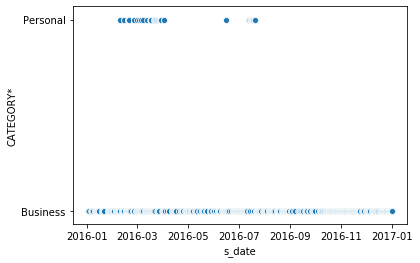

In [30]:
sns.scatterplot(x=cab["s_date"],y=cab["CATEGORY*"])

In [33]:
cab.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 's_date', 'end_date'],
      dtype='object')

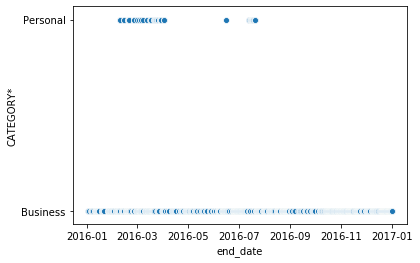

In [34]:
sns.scatterplot(x=cab["end_date"],y=cab["CATEGORY*"])

In [47]:
cab["s_date"].value_counts().to_dict()

{Timestamp('2016-06-28 23:34:00'): 2,
 Timestamp('2016-11-25 13:13:00'): 1,
 Timestamp('2016-04-15 11:36:00'): 1,
 Timestamp('2016-12-09 12:09:00'): 1,
 Timestamp('2016-08-28 21:15:00'): 1,
 Timestamp('2016-07-08 13:48:00'): 1,
 Timestamp('2016-12-17 15:38:00'): 1,
 Timestamp('2016-03-21 20:18:00'): 1,
 Timestamp('2016-02-19 11:45:00'): 1,
 Timestamp('2016-06-27 13:56:00'): 1,
 Timestamp('2016-12-30 16:45:00'): 1,
 Timestamp('2016-07-27 22:00:00'): 1,
 Timestamp('2016-01-20 13:25:00'): 1,
 Timestamp('2016-06-30 20:09:00'): 1,
 Timestamp('2016-03-07 09:23:00'): 1,
 Timestamp('2016-06-27 09:05:00'): 1,
 Timestamp('2016-03-01 21:27:00'): 1,
 Timestamp('2016-03-13 21:11:00'): 1,
 Timestamp('2016-07-23 20:17:00'): 1,
 Timestamp('2016-03-08 14:38:00'): 1,
 Timestamp('2016-09-29 16:13:00'): 1,
 Timestamp('2016-12-28 13:53:00'): 1,
 Timestamp('2016-07-27 21:34:00'): 1,
 Timestamp('2016-10-24 16:34:00'): 1,
 Timestamp('2016-02-20 16:59:00'): 1,
 Timestamp('2016-02-29 11:07:00'): 1,
 Timestamp('

In [89]:
start=cab[(cab["s_date"]>"2016-01-01")&(cab["end_date"]<="2016-07-31")]#start date between 2016 jan to july show category
start.shape#7 months data start date

(611, 9)

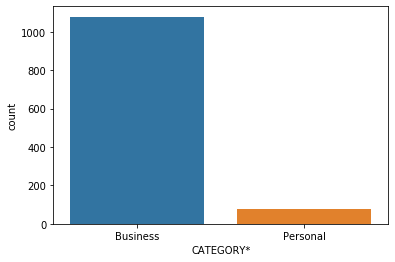

In [90]:
sns.countplot(cab["CATEGORY*"])#total no of business catewgory businees wise in the data more than 1000 customers and personal are very less


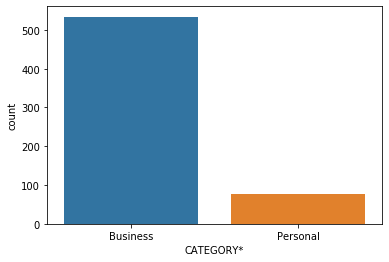

In [91]:
sns.countplot(start["CATEGORY*"])

In [92]:
start["CATEGORY*"].value_counts()#first 7 months data showing 2016 january to july start business category are business person 
print("total no of the customers are whose data are 2016 jan to 2016 july :",len(start))
print("customers are purchasing category are: ",start["CATEGORY*"].value_counts().to_dict())

total no of the customers are whose data are 2016 jan to 2016 july : 611
customers are purchasing category are:  {'Business': 534, 'Personal': 77}


In [88]:
cab[["s_date","end_date"]]

,s_date,end_date
0,2016-01-01 21:11:00,2016-01-01 21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00
...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00


In [96]:
end=cab[cab["s_date"]>="2016-08-01"]

In [97]:
end.shape

(543, 9)

In [98]:
end["CATEGORY*"].value_counts()#first 7 months data showing 2016 january to july start business category are business person 
print("total no of the customers are whose data are 2016 jan to 2016 july :",len(end))
print("customers are purchasing category are: ",end["CATEGORY*"].value_counts().to_dict())

total no of the customers are whose data are 2016 jan to 2016 july : 543
customers are purchasing category are:  {'Business': 543}


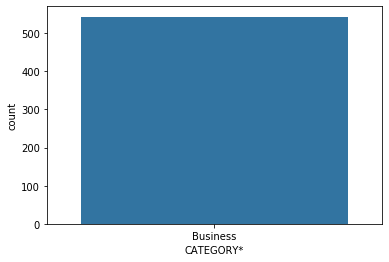

In [99]:
sns.countplot(end["CATEGORY*"])

In [102]:

print("customers are purchasing category are: ",end["CATEGORY*"].value_counts().to_dict())

customers are purchasing category are:  {'Business': 543}


In [103]:
cab.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 's_date', 'end_date'],
      dtype='object')

In [111]:
ch_miss=round(cab.isnull().sum()/len(cab),4)*100
ch_miss

START_DATE*     0.00
END_DATE*       0.00
CATEGORY*       0.00
START*          0.00
STOP*           0.00
MILES*          0.00
PURPOSE*       43.46
s_date          0.00
end_date        0.00
dtype: float64

In [112]:
#create fun value counts in dictionary form
def v_count(data,col):
    g1=data[col].value_counts(dropna=False).to_dict()
    return g1


In [113]:
v_count(cab,"PURPOSE*")

{nan: 502,
 'Meeting': 187,
 'Meal/Entertain': 160,
 'Errand/Supplies': 128,
 'Customer Visit': 101,
 'Temporary Site': 50,
 'Between Offices': 18,
 'Moving': 4,
 'Airport/Travel': 3,
 'Commute': 1,
 'Charity ($)': 1}

In [114]:
cab.fillna({"PURPOSE*":"not-identified"},inplace=True)

In [115]:
v_count(cab,"PURPOSE*")

{'not-identified': 502,
 'Meeting': 187,
 'Meal/Entertain': 160,
 'Errand/Supplies': 128,
 'Customer Visit': 101,
 'Temporary Site': 50,
 'Between Offices': 18,
 'Moving': 4,
 'Airport/Travel': 3,
 'Commute': 1,
 'Charity ($)': 1}

In [121]:
cab["PURPOSE*"]=cab["PURPOSE*"].replace(["Commute","Airport/Travel","Moving",
                                         "Between Offices","Temporary Site","Customer Visit"],"daily-purpose")

In [122]:
v_count(cab,"PURPOSE*")

{'not-identified': 502,
 'Meeting': 187,
 'daily-purpose': 177,
 'Meal/Entertain': 160,
 'Errand/Supplies': 128,
 'Charity ($)': 1}

In [123]:
cab["PURPOSE*"]=cab["PURPOSE*"].replace("Meeting","daily-purpose")
cab["PURPOSE*"]=cab["PURPOSE*"].replace(["Meal/Entertain","Errand/Supplies","Charity ($)"],"transportation-purpose")

In [125]:
v_count(cab,"PURPOSE*")

{'not-identified': 502, 'daily-purpose': 364, 'transportation-purpose': 289}

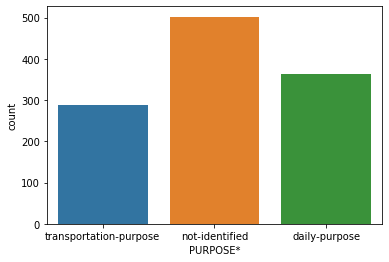

In [126]:
sns.countplot(cab["PURPOSE*"])

In [128]:
start=cab[(cab["s_date"]>"2016-01-01")&(cab["end_date"]<="2016-07-31")]#start date between 2016 jan to july show category
start.shape#7 months data start date

(611, 9)

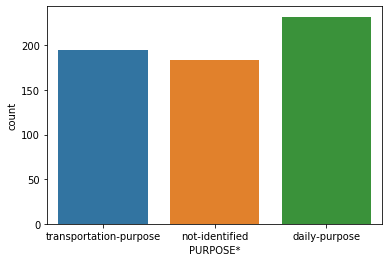

In [129]:
sns.countplot(start["PURPOSE*"])

In [130]:
end=cab[cab["s_date"]>="2016-08-01"]

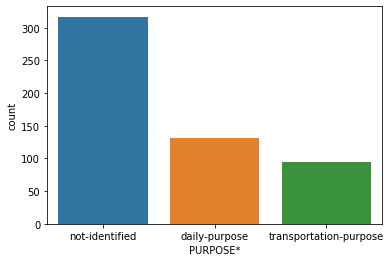

In [132]:
sns.countplot(end["PURPOSE*"])